In [1]:
# Import Required Packages
import numpy as np
from helpers import load_itk, plot_view, show_image

In [2]:
def find_roi_2D(s):
    """

    :param s:
    :return:
    """

    # rotate -90
    s_rotated = np.rot90(s, k=3)

    # flip slice
    s_fliped = np.flip(s, axis=0)
    s_rotated_fliped = np.flip(s_rotated, axis=0)

    # Get up and down coordiates
    y1 = np.unravel_index(np.argmax(s, axis=None), s.shape)
    y2 = np.unravel_index(np.argmax(s_fliped, axis=None), s.shape)

    x1 = np.unravel_index(np.argmax(s_rotated, axis=None), s.shape)
    x2 = np.unravel_index(np.argmax(s_rotated_fliped, axis=None), s.shape)

    # return x1, x2, y1, y2 of image
    return x1[0], s.shape[1]-x2[0], y1[0], s.shape[0]-y2[0]


# Testing



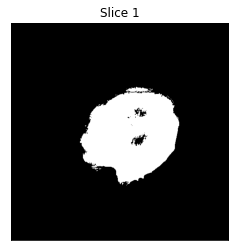

In [3]:
path = '../Dataset/trv1p1cti-heart_label.nii.gz'
_,volume,_,_ = load_itk(path)
# plot_view(volume)
slice_1 = volume[20,:,:]
show_image(slice_1,"Slice 1", 'gray')

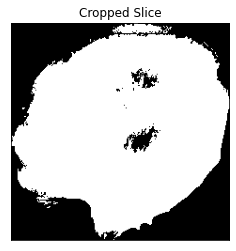

In [4]:
x1,x2,y1,y2 = find_roi_2D(slice_1)
show_image(slice_1[y1:y2, x1:x2], 'Cropped Slice')